In [27]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [28]:
df = pd.read_pickle('./e_store.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433938 entries, 0 to 433937
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   event_time        433938 non-null  datetime64[ns, UTC]
 1   order_id          433938 non-null  int64              
 2   product_id        433938 non-null  int64              
 3   category_id       433938 non-null  float64            
 4   brand             419890 non-null  object             
 5   price             433938 non-null  float64            
 6   user_id           433938 non-null  float64            
 7   product_category  433938 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(2)
memory usage: 26.5+ MB


In [29]:
df.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,product_category
0,2020-01-05 04:06:18+00:00,2348710347105370326,1515966223509088613,2.268105e+18,apple,203.68,1.515916e+18,headphone
1,2020-01-05 04:09:00+00:00,2348709909622685923,1515966223509127621,2.268105e+18,microlab,27.75,1.515916e+18,notebook
2,2020-01-05 04:35:21+00:00,2348710405431361995,1515966223509129592,2.268105e+18,samsung,11.55,1.515916e+18,screw
3,2020-01-05 04:44:43+00:00,2348709879230758992,1515966223509259180,2.268105e+18,lg,578.68,1.515916e+18,washer
4,2020-01-05 04:56:26+00:00,2348710371440722247,1515966223509298224,2.268105e+18,rivacase,28.91,1.515916e+18,bag


# List of orders with the number of ordered products and the value of the order.

List ordered descending by the value of order.

In [30]:
df[['order_id','price']].groupby(by='order_id')\
    .price.agg([len,sum])\
    .rename(columns={'len':'items count', 'sum':'total value'})\
    .sort_values(by='total value', ascending=False)\
    .head(15)

,items count,total value
order_id,,
2339244674033647628,2,18699.03
2339940319191106553,1,13310.16
2388440981134484484,3,11782.33
2353288509000777918,1,11574.05
2388440981134633711,8,10451.20
2388440981134633178,6,9793.86
2308774433587724743,1,9606.48
2388440981134623922,7,8895.68
2388440981134633704,8,8819.25


In [31]:
df['month']= df['event_time'].dt.month

# Number of orders over the time

In [94]:
t = df[df['brand']=='samsung'][['event_time', 'price']]
t['sales_date'] = t['event_time'].dt.year.astype('str') + '-' + t['event_time'].dt.month.astype('str') + '-' +\
                  t['event_time'].dt.day.astype('str')
t['sales_date'] = pd.to_datetime(t['sales_date'], format='%Y-%m-%d')
t.drop(columns='event_time', inplace=True)
t = t[t['sales_date'].dt.year > 1970]
t = t[t['sales_date'].dt.month < 4]
t.sort_values(by='sales_date').reset_index(drop=True)
t = t.groupby(by='sales_date').count().rename(columns={'price':'orders count'})
t

,orders count
sales_date,
2020-01-05,56
2020-01-06,63
2020-01-07,83
2020-01-08,60
2020-01-09,45
...,...
2020-03-27,59
2020-03-28,61
2020-03-29,72


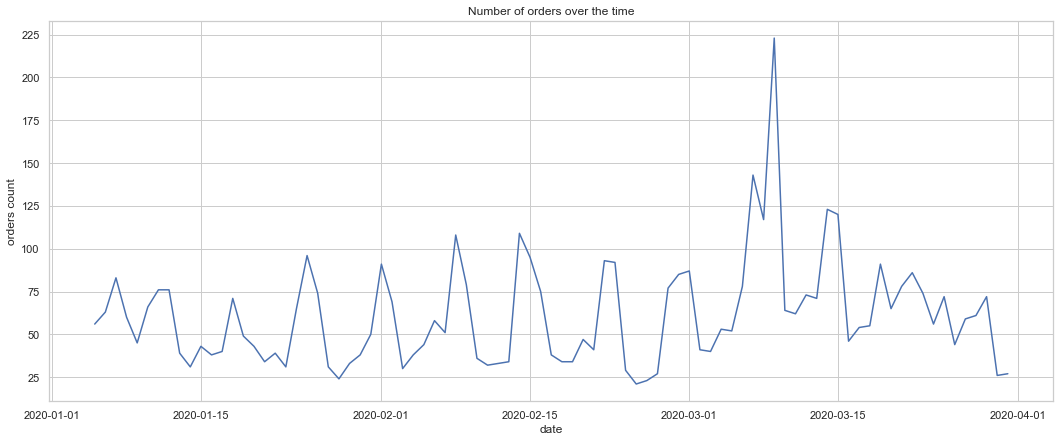

In [33]:
plt.figure(figsize=(18,7))
plt.plot(t)
plt.title('Number of orders over the time')
plt.xlabel('date')
plt.ylabel('orders count')
plt.show()

# List of product categories available in shop with selling history details.

In [34]:
df[['product_category','price']].groupby(by='product_category')\
    .price.agg([len,sum])\
    .rename(columns={'len':'sold items count', 'sum':'total value'})\
    .sort_values(by='sold items count', ascending=False)

,sold items count,total value
product_category,,
smartphone,102554,41216258.62
notebook,25918,14788035.02
refrigerators,20285,8625193.15
headphone,20055,1676612.45
tv,17625,8756178.66
...,...,...
swing,8,925.76
watering,5,28.82
snowboard,3,755.05


# List of brands available in shop with selling history details.

List ordered descending by the number of sold products.

In [35]:
df1 = df[['price','brand']]\
    .groupby(by=['brand'])\
    .price.agg([len,np.mean,min,max,sum])
df1.sort_values('len', ascending=False).head(20)

,len,mean,min,max,sum
brand,,,,,
samsung,89881,319.570758,1.83,10416.64,28723339.26
apple,34837,743.617162,12.71,6018.50,25905391.08
ava,20415,79.388722,2.29,1273.13,1620720.76
lg,16325,473.281980,18.50,11574.05,7726328.33
tefal,14424,88.283464,6.00,648.13,1273400.69
xiaomi,12020,189.887923,0.23,2314.79,2282452.84
huawei,9899,220.773589,9.24,1157.38,2185437.76
bosch,9399,325.083805,11.55,1527.75,3055462.68
asus,9093,557.854328,13.87,4629.61,5072569.40


# List of the selling details in particular months, ordered by the summary revenue.

In [36]:
df1 = df[['price','month']]\
    .groupby(by=['month'])\
    .price.agg([len,np.mean,min,max,sum])\
    .rename(columns={'len':'sold items count', 'sum':'summary revenue', 'mean':'mean order value', 'min':'minimum order value', 'max':'maximum order value'})
df1.sort_values('summary revenue', ascending=False)

,sold items count,mean order value,minimum order value,maximum order value,summary revenue
month,,,,,
8,84328,310.338964,0.21,6018.50,26170264.16
10,77051,230.683257,0.21,7407.38,17774375.67
9,55248,286.022007,0.21,10416.64,15802143.86
7,62788,242.341610,0.00,11574.05,15216144.98
11,48354,224.205430,0.21,7407.38,10841229.34
5,31721,227.695641,0.00,9606.48,7222733.44
6,30798,224.637004,0.00,18328.68,6918370.45
3,12938,197.529471,0.23,3935.16,2555636.29
2,12028,161.873265,0.00,3935.16,1947011.63


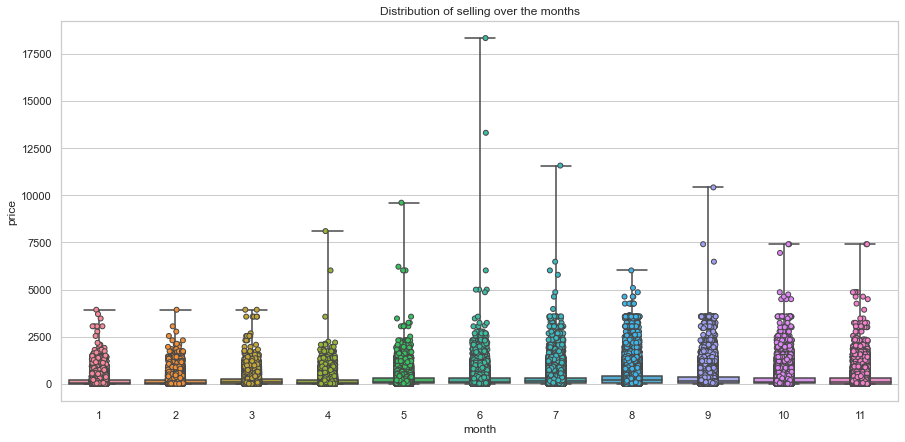

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(x="month", y="price", data=df, whis=np.inf)
ax = sns.stripplot(x='month', y='price', data=df,linewidth=1)
plt.title('Distribution of selling over the months')
plt.show()

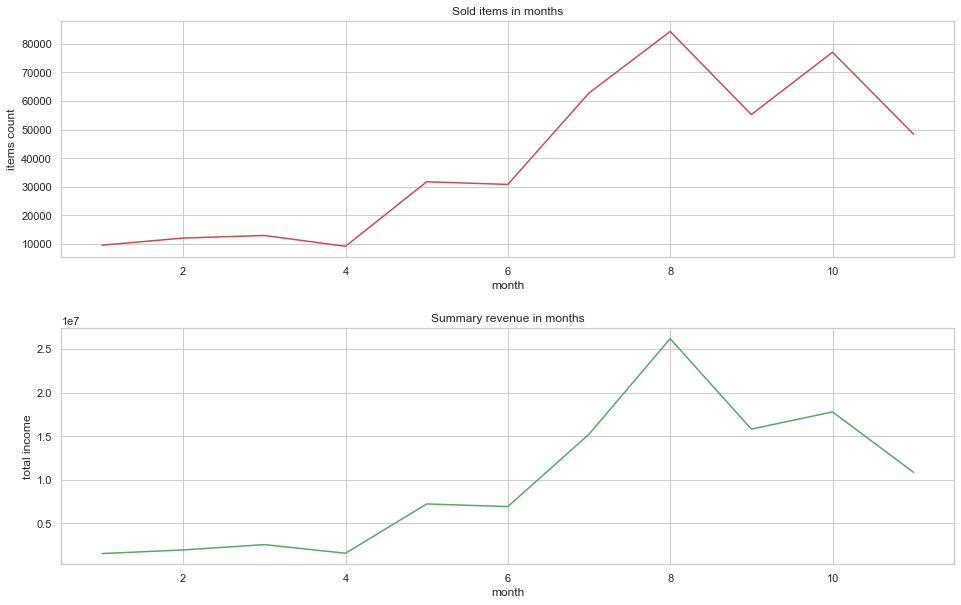

In [93]:
fig, axs = plt.subplots(2,1,figsize=(16,10))
axs[0].plot(df[['order_id','month']]\
    .groupby(by=['month'])\
    .count()\
    .sort_values('month'), "r")
axs[0].set_title('Sold items in months')
axs[0].set_xlabel('month')
axs[0].set_ylabel('items count')
axs[1].plot(df[['price','month']]\
    .groupby(by=['month'])\
    .sum()\
    .sort_values('month'), "g")
axs[1].set_title('Summary revenue in months')
axs[1].set_xlabel('month')
axs[1].set_ylabel('total income')
fig.subplots_adjust(hspace=0.3)
plt.show()

# Smartphone sales grouped by brands

List ordered descending by sold products count.

In [77]:
df[df['product_category']=='smartphone'][['price','brand']].groupby('brand')\
    .price.agg([len,np.mean,min,max,sum])\
    .sort_values('len', ascending=False)\
    .rename(columns={'len':'sold items count', 'sum':'summary revenue', 'mean':'mean order value', 'min':'minimum order value', 'max':'maximum order value'})

,sold items count,mean order value,minimum order value,maximum order value,summary revenue
brand,,,,,
samsung,51376,315.700719,11.01,2314.79,16219440.12
apple,23365,820.836645,33.70,2002.29,19178848.22
xiaomi,8328,196.480953,0.23,648.13,1636293.38
huawei,7738,243.311168,12.23,1157.38,1882741.82
oppo,6876,244.232797,49.98,1157.38,1679344.71
honor,1993,168.490447,62.25,393.26,335801.46
vivo,825,200.649685,104.14,694.42,165535.99
sony,517,160.089594,0.00,555.30,82766.32
awax,490,5.560000,5.56,5.56,2724.40


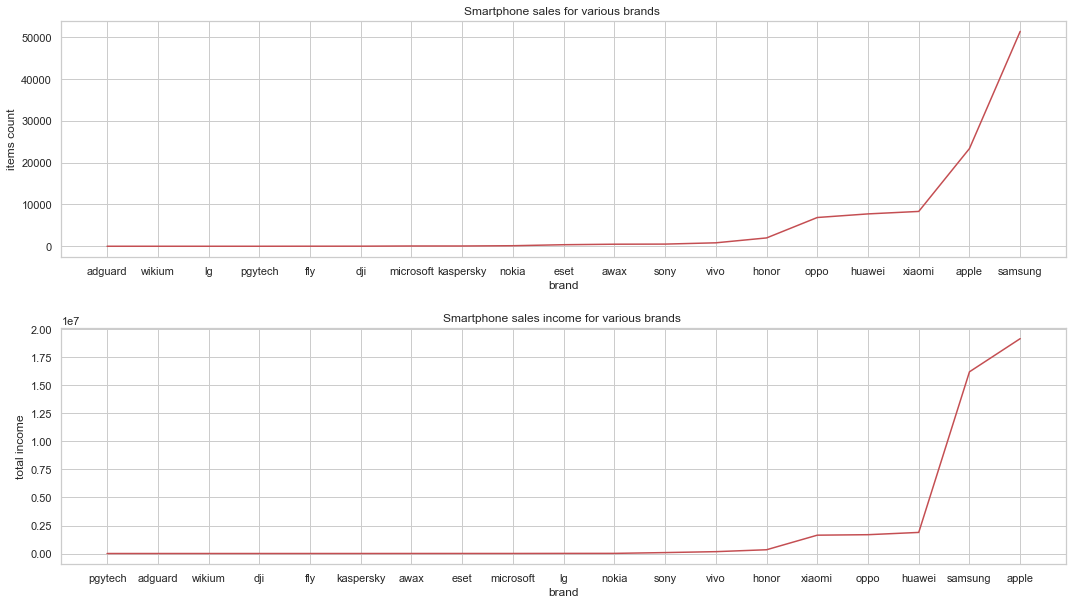

In [90]:
fig, axs = plt.subplots(2,1,figsize=(18,10))
axs[0].plot(df[df['product_category']=='smartphone'][['price','brand']].groupby('brand')\
    .count().sort_values('price', ascending=True), 'r')
axs[0].set_title('Smartphone sales for various brands ')
axs[0].set_xlabel('brand')
axs[0].set_ylabel('items count')
axs[1].plot(df[df['product_category']=='smartphone'][['price','brand']].groupby('brand')\
    .sum().sort_values('price', ascending=True), 'r')
axs[1].set_title('Smartphone sales income for various brands ')
axs[1].set_xlabel('brand')
axs[1].set_ylabel('total income')
fig.subplots_adjust(hspace=0.3)
plt.show()

# Implementation of the recommendation system

In [56]:
temp = df[['order_id','product_category']]
temp

,order_id,product_category
0,2348710347105370326,headphone
1,2348709909622685923,notebook
2,2348710405431361995,screw
3,2348709879230758992,washer
4,2348710371440722247,bag
...,...,...
433933,2388440981134693941,tv
433934,2388440981134693942,smartphone
433935,2388440981134693943,smartphone
433936,2388440981134693944,scales


In [57]:
temp = (temp.groupby(['order_id'])
      .agg({'product_category': lambda x: x.tolist()})
      .reset_index())
temp

,order_id,product_category
0,2294359932054536986,"[tablet, tablet]"
1,2294444024058086220,"[headphone, headphone]"
2,2295716521449619559,[table]
3,2295740594749702229,"[smartphone, smartphone, smartphone, smartphone]"
4,2295902490203259134,[refrigerators]
...,...,...
338135,2388440981134693939,[printer]
338136,2388440981134693941,"[tv, tv]"
338137,2388440981134693942,[smartphone]
338138,2388440981134693943,[smartphone]


In [45]:
lists = []
for wiersz in temp['product_category']:
    lists.append(wiersz)

In [46]:
lists[:5]

[['tablet', 'tablet'],
 ['headphone', 'headphone'],
 ['table'],
 ['smartphone', 'smartphone', 'smartphone', 'smartphone'],
 ['refrigerators']]

In [48]:
te = TransactionEncoder()
one_hot = te.fit_transform(lists)
df1 = pd.DataFrame(one_hot, columns=te.columns_)
df1

,acoustic,air_conditioner,air_heater,alarm,anti_freeze,bag,bath,battery,bed,bicycle,...,umbrella,vacuum,video,videocards,videoregister,washer,water_heater,watering,weather_station,welding
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338135,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
338136,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
338137,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
338138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
supp = apriori(df1, use_colnames=True, min_support = 0.0001)

In [60]:
supp.head()

,support,itemsets
0,0.001275,(acoustic)
1,0.020521,(air_conditioner)
2,0.007512,(air_heater)
3,0.000722,(alarm)
4,0.000269,(anti_freeze)


In [61]:
rule = association_rules(supp, min_threshold=0.7)

In [62]:
rule.sort_values(by='lift',  inplace=True)
rule.reset_index(drop=True, inplace=True)
rule.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5709,"(mouse, power_supply, cpu)","(keyboard, motherboard)",0.000136,0.000287,0.000101,0.739130,2576.593456,0.000101,3.832234
5710,"(mouse, motherboard, hdd)","(keyboard, cpu)",0.000127,0.000305,0.000101,0.790698,2595.791375,0.000101,4.776322
5711,"(mouse, cpu, hdd)","(keyboard, motherboard)",0.000133,0.000287,0.000101,0.755556,2633.851088,0.000101,4.089736
5712,"(mouse, cpu, monitor)","(keyboard, motherboard)",0.000130,0.000287,0.000101,0.772727,2693.711340,0.000101,4.398738
5713,"(mouse, motherboard, monitor)","(keyboard, cpu)",0.000118,0.000305,0.000101,0.850000,2790.475728,0.000101,6.664636


In [63]:
rule['antecedents'] = rule['antecedents'].apply(lambda x: list(x))
rule['consequents'] = rule['consequents'].apply(lambda x: list(x))

In [68]:
values_list = [['mouse', 'cpu', 'hdd']]

Values list represents the list of the products in the order for which we want to have a recommendation.

In [71]:
boolean_series = rule.antecedents.isin(values_list)
filtered_df = rule[boolean_series]

filtered_df = filtered_df.explode('consequents')
filtered_df_view = filtered_df[['antecedents','consequents','lift']]\
    .drop_duplicates(subset=['consequents'], keep='last')\
    .sort_values(by='lift', ascending=False)\
    .reset_index(drop=True)
filtered_df_view[['antecedents','consequents']]\
    .rename(columns={'antecedents': 'ordered products', 'consequents': 'recomended products'})

,ordered products,recomended products
0,"[mouse, cpu, hdd]",keyboard
1,"[mouse, cpu, hdd]",motherboard
2,"[mouse, cpu, hdd]",videocards
3,"[mouse, cpu, hdd]",power_supply
4,"[mouse, cpu, hdd]",memory
5,"[mouse, cpu, hdd]",monitor


The list above represent the list of recommended products for this order.